# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN on augmented images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [10]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train=y_train.flatten()
y_test=y_test.flatten()

### 2. Visualize the First 24 Training Images

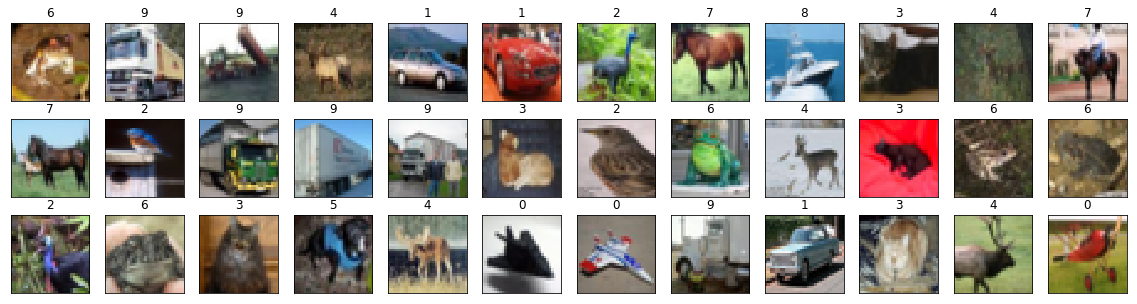

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title(y_train[i])

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [12]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [13]:
from keras.utils import np_utils

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### 5. Create and Configure Augmented Image Generator
### 采用图片增强，随机平移和旋转图片
### https://keras-cn.readthedocs.io/en/latest/preprocessing/image/

In [18]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally随机水平翻转

# fit augmented image generator on data
datagen_train.fit(x_train)

In [21]:
np.shape(x_train)

(45000, 32, 32, 3)

### 6. Visualize Original and Augmented Images

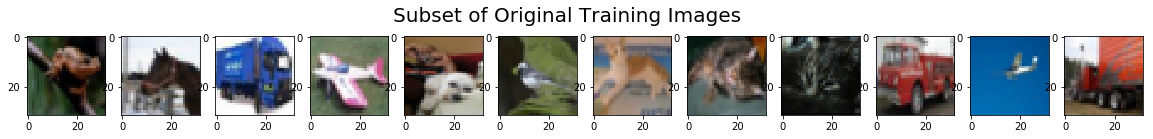

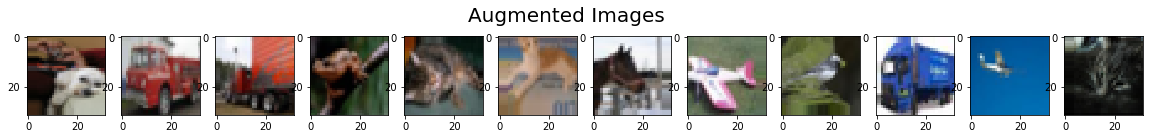

In [26]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12): #以每12两张图为一批次进行图像增强处理
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

### 7. Define the Model Architecture 

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dro

### 8. Compile the Model 

In [28]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### 9. Train the Model 

In [31]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath=r'C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),#fit_generator来拟合训练具有图像增强效果后的图片
                    steps_per_epoch=x_train.shape[0] // batch_size,#datagen_train.flow来生成增强的图片，batch_size为一个批次
                    epochs=epochs, verbose=2, callbacks=[checkpointer],#steps_per_epoch为总样本数/批次数,代表每个迭代中计算的步数，即每个迭代中都增强了整个图片
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/100
Epoch 00001: val_loss improved from inf to 1.34520, saving model to C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\aug_model.weights.best.hdf5
 - 38s - loss: 1.6479 - acc: 0.4032 - val_loss: 1.3452 - val_acc: 0.5158
Epoch 2/100
Epoch 00002: val_loss improved from 1.34520 to 1.13593, saving model to C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\aug_model.weights.best.hdf5
 - 37s - loss: 1.3491 - acc: 0.5165 - val_loss: 1.1359 - val_acc: 0.5978
Epoch 3/100
Epoch 00003: val_loss improved from 1.13593 to 1.06073, saving model to C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\aug_model.weights.best.hdf5
 - 36s - loss: 1.2422 - acc: 0.5592 - val_loss: 1.0607 - val_acc: 0.6254
Epoch 4/100
Epoch 00004: val_loss improved from 1.06073 to 0.95188, saving model to C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\aug_model.weights.best.hdf5
 - 37s - loss: 1.1795 - acc: 0.5820 - val_loss: 0.9519 - val_acc: 0.6664
Epoch 5/100
Epoch 00

KeyboardInterrupt: 

### 10. Load the Model with the Best Validation Accuracy

In [32]:
# load the weights that yielded the best validation accuracy
model.load_weights(r'C:\Users\zhangwenqi\Desktop\神经网络test\第二课卷积神经网络\keras实现卷积神经网络\aug_model.weights.best.hdf5')

### 11. Calculate Classification Accuracy on Test Set

In [33]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6769
